In [1]:
#Using the Sequential API to build a regression MLP that predicts prices for California homes

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [23]:
housing = fetch_california_housing()

#Split data to get training and test set 
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)

#Further split X_train_full and y_train_full into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

housing[:10]

TypeError: unhashable type: 'slice'

In [3]:
#Scale all the datasets

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [6]:
from tensorflow import keras
#The dataset is kinda noisy, so use a single hidden layer with relatively few neurons to avoid overfitting.
#The output layer has a single neuron because we only want to predict a single value.

model = keras.models.Sequential([
    keras.layers.Dense(30, activation = "relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

model.compile(loss="mean_squared_error", optimizer="sgd")

history = model.fit(X_train, y_train, epochs = 20, validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 0s 1ms/step - loss: 0.9254 - val_loss: 6.9625
Epoch 2/20
363/363 [==============================] - 0s 875us/step - loss: 0.8503 - val_loss: 0.5382
Epoch 3/20
363/363 [==============================] - 0s 878us/step - loss: 0.4784 - val_loss: 0.4406
Epoch 4/20
363/363 [==============================] - 0s 905us/step - loss: 0.4148 - val_loss: 0.4142
Epoch 5/20
363/363 [==============================] - 0s 905us/step - loss: 0.3987 - val_loss: 0.4030
Epoch 6/20
363/363 [==============================] - 0s 878us/step - loss: 0.3836 - val_loss: 0.3962
Epoch 7/20
363/363 [==============================] - 0s 878us/step - loss: 0.3780 - val_loss: 0.3846
Epoch 8/20
363/363 [==============================] - 0s 867us/step - loss: 0.3788 - val_loss: 0.3831
Epoch 9/20
363/363 [==============================] - 0s 897us/step - loss: 0.3685 - val_loss: 0.3775
Epoch 10/20
363/363 [==============================] - 0s 903us/step - loss: 0.3645 

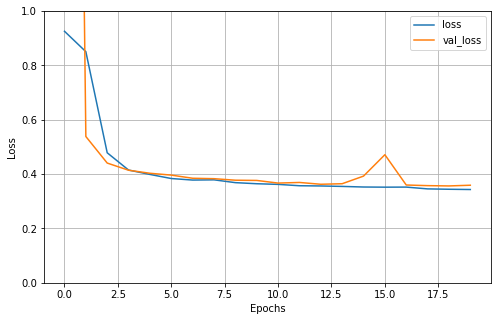

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [9]:
#Testing
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

162/162 [==============================] - 0s 629us/step - loss: 0.3689


In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 30)                270       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 31        
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________
